# 챕터 15 실습 코드들 

챕터 15의 실습에 필요한 코드 예제를 구글 코랩에서 여시려면 [링크](https://colab.research.google.com/drive/1LWv7-0pXbfXA4aSgSpLxBgUhKP-vNwpo?usp=sharing)를 클릭하시거나 아래의 주소를 웹브라우저에 복사해 주세요. 

실습 코드 링크: https://colab.research.google.com/drive/1LWv7-0pXbfXA4aSgSpLxBgUhKP-vNwpo?usp=sharing


## 15.2. 실습하기 

### [코드 예제 15.1.1- 필요한 라이브러리 불러오기] 

In [18]:
# 데이터 정제 및 전처리를 위해 필요한 라이브러리
import numpy as np
import pandas as pd 
import datetime as dt

# 시각화를 위한 라이브러리 
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns 

# k-mean 군집화를 위한 라이브러리 로딩 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

### [코드 예제 15.1.1-2: 인공지능 학습에 필요한 데이터 불러오기] 

In [19]:
df = pd.read_csv("https://raw.githubusercontent.com/skku-ai-textbook/aitextbook/main/data/CH14-data.csv")
print("데이터 셋은 총 {}개의 행과 {}개의 열로 이루어져있습니다".format(*df.shape))

df.describe()

데이터 셋은 총 3926개의 행과 3개의 열로 이루어져있습니다


,rain,temp
count,3926.000000,3926.000000
mean,5.306368,13.162834
std,9.156323,10.199530
min,0.000000,-13.029951
25%,1.000000,4.673711
50%,2.300000,13.963622
75%,4.600000,21.540499
max,106.300000,35.376268


### [코드 예제 15.1.2-1: 변수 시각화] 

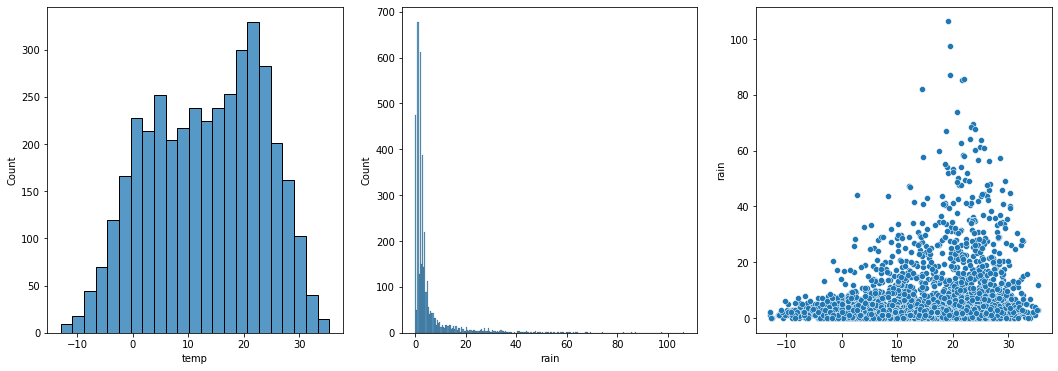

In [20]:
# 이미지 시각화
figure, axs = plt.subplots(ncols=3) 
figure.set_size_inches(18,6)  


sns.histplot(data=df, x="temp", ax=axs[0]) # 강수량 
sns.histplot(data=df, x="rain", ax=axs[1]) #평균기온 
sns.scatterplot(x=df['temp'], y=df['rain'], ax=axs[2]) # 산점도 

### [코드 예제 15.2.1-1: k-평균 모델 학습] 


In [21]:
# 모델 선언 
kmeans = KMeans(n_clusters = 4, random_state=830731)
# 모델 학습 
kmeans.fit(df[['temp', 'rain']]) 

KMeans(n_clusters=4, random_state=830731)

### [코드 예제 15.2.2-1: k-평균 군집 모델 학습 결과 확인] 

In [22]:
# 분류된 결과값을 확인 
kmeans.labels_

# 학습된 모델을 통해 각 데이터별로 분류된 군집을 저장함 
df['cluster'] = kmeans.labels_

# 각 군집에 분류된 데이터 수(날짜 수) 확인 
print(df['cluster'].value_counts())

# 첫 5행과 마지막 5행을 함께 출력 
df.head().append(df.tail())

2    1282
0    1204
1    1201
3     239
Name: cluster, dtype: int64


,date,rain,temp,cluster
0,2010-01-01,1.0,-7.030367,1
1,2010-01-02,2.8,-4.201838,1
2,2010-01-03,2.0,-2.479552,1
3,2010-01-04,6.9,3.896076,1
4,2010-01-05,2.7,-5.171530,1
3921,2020-09-26,2.4,14.855325,0
3922,2020-09-27,1.2,15.636958,0
3923,2020-09-28,2.0,16.087594,0
3924,2020-09-29,1.0,19.233569,2
3925,2020-09-30,1.2,14.894897,0


### [코드 예제 15.2.3-1: 각 군집 별 중심값 확인] 

In [23]:
# 각 군집의 중심값을 출력 
centers = kmeans.cluster_centers_ 
print(centers)

# 군집 별 기술통계량 확인
print("\n그룹 별 강수량 비교\n")
print(df.groupby('cluster')['rain'].describe().applymap("{0:.3f}".format))
print("\n그룹 별 평균온도 비교\n")
print(df.groupby('cluster')['temp'].describe().applymap("{0:.3f}".format))

[[12.7993671   3.21842324]
 [ 0.69171805  2.53330565]
 [23.87514688  4.31330203]
 [20.53883215 35.11338912]]

그룹 별 강수량 비교

            count    mean     std     min     25%     50%     75%      max
cluster                                                                   
0        1204.000   3.215   3.735   0.000   1.000   2.000   3.900   20.900
1        1201.000   2.534   2.522   0.000   1.000   2.000   3.100   20.300
2        1282.000   4.311   4.333   0.000   1.300   3.000   5.400   20.400
3         239.000  35.113  14.850  19.500  25.000  29.900  41.200  106.300

그룹 별 평균온도 비교

            count    mean    std      min     25%     50%     75%     max
cluster                                                                  
0        1204.000  12.766  3.362    6.174   9.938  12.706  15.761  18.697
1        1201.000   0.676  4.111  -13.030  -2.059   1.174   4.063   6.845
2        1282.000  23.858  3.732   17.334  20.853  23.240  26.428  35.376
3         239.000  20.539  6.323    2.137 

### [코드 예제 15.2.3-2: 그룹별 중심값 시각화 하기] 

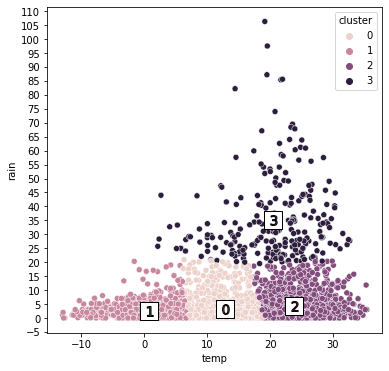

In [24]:
# 이미지를 표시할 캔버스 설정 
figure, (ax1) = plt.subplots(nrows=1, ncols=1) # 총 하나의 이미지를 생성하여 표시하도록 설정8
figure.set_size_inches(6,6) # 이미지를 표시할 캔버스의 크기를 설정 

# 1. 스캐터 플롯
sns.scatterplot(x=df['temp'], y=df['rain'], hue=df['cluster'], ax=ax1)

# Y 축
ax1.yaxis.set_major_locator(mpl.ticker.MultipleLocator(5)) # 이미지의 Y축 주요 단위를 25로 설정 

# 2. 군집 집단 중심점에 네모 표시
# marker: 마크 모양 | c: 색깔 지정 | 
# alpha: '투명도' |  s: 사이즈 | edgecolor: 경계선 색깔       
ax1.scatter(centers[:, 0], centers[:, 1], marker='s',
            c="white", alpha=1, s=300, edgecolor='black') 


# 3. 각 점마다 집단 숫자 표시
for i, c in enumerate(centers):
    ax1.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                s=100, edgecolor='black')

## 15.3. K-평균 군집화 모델 평가

### [코드 예제 15.3.2-1: 각 데이터 별 실루엣 계수 추정] 

In [25]:
# 각 날짜 별 실루엣 계수 측정 
df['sil_coef'] = silhouette_samples(df[['temp','rain']], df['cluster'])

# 첫 5행과 마지막 5행을 함께 출력 
df.head().append(df.tail())

,date,rain,temp,cluster,sil_coef
0,2010-01-01,1.0,-7.030367,1,0.584256
1,2010-01-02,2.8,-4.201838,1,0.648403
2,2010-01-03,2.0,-2.479552,1,0.679386
3,2010-01-04,6.9,3.896076,1,0.354861
4,2010-01-05,2.7,-5.171530,1,0.629278
3921,2020-09-26,2.4,14.855325,0,0.552396
3922,2020-09-27,1.2,15.636958,0,0.480911
3923,2020-09-28,2.0,16.087594,0,0.441538
3924,2020-09-29,1.0,19.233569,2,0.106202
3925,2020-09-30,1.2,14.894897,0,0.541869


### [코드 예제 15.3.2-2: k값이 4인 k-평균 군집 모델 실루엣 점수 구하기] 

In [26]:
# 실루엣 점수 구하기 
average_score = silhouette_score(df[['temp','rain']], df['cluster'])

# 실루엣 점수 출력 
print('silhouette_score를 사용해 구한 실루엣 분석 점수:{0:15.3f}'.format(average_score))

# 기존에 silhouette_samples를 사용한 실루엣 점수 
print('silhouette_samples를 사용하여 만든 실루엣 계수의 평균값: {0:8.3f}'.format(df['sil_coef'].mean()))

silhouette_score를 사용해 구한 실루엣 분석 점수:          0.443
silhouette_samples를 사용하여 만든 실루엣 계수의 평균값:    0.443


### [코드 예제 15.3.3-1: 실루엣 계수 평균을 사용한 모델 비교] 

In [27]:
# 각 k 을 2,12까지 반복
for i in range(2,13): 
    
    # 각 k값에 해당하는 k-평균 군집화 모델 생성
    kmeans = KMeans(n_clusters = i, random_state=1)
    
    # 학습된 모델을 사용하여 '군집수_k'의 형태로 결과 저장 
    df[str('cluster_'+str(i))]  = kmeans.fit_predict(df[['temp','rain']])
    
    # 각 실루엣 계수를 저장 
    df[str('coef_'+str(i))] = silhouette_samples(df[['temp','rain']], df[str('cluster_'+str(i))])

    # 실루엣 계수 평균 출력 
    average_score = silhouette_score(df[['temp','rain']], df[str('cluster_'+str(i))] )

    # 결과값 출력 
    print("데이터를 {k:2} 개의 집단으로 나누는 k-평균 군집 분석의 실루엣 계수 평균: {mean:5.3f}".format(k=i, mean=average_score))


데이터를  2 개의 집단으로 나누는 k-평균 군집 분석의 실루엣 계수 평균: 0.474
데이터를  3 개의 집단으로 나누는 k-평균 군집 분석의 실루엣 계수 평균: 0.536
데이터를  4 개의 집단으로 나누는 k-평균 군집 분석의 실루엣 계수 평균: 0.444
데이터를  5 개의 집단으로 나누는 k-평균 군집 분석의 실루엣 계수 평균: 0.458
데이터를  6 개의 집단으로 나누는 k-평균 군집 분석의 실루엣 계수 평균: 0.406
데이터를  7 개의 집단으로 나누는 k-평균 군집 분석의 실루엣 계수 평균: 0.409
데이터를  8 개의 집단으로 나누는 k-평균 군집 분석의 실루엣 계수 평균: 0.421
데이터를  9 개의 집단으로 나누는 k-평균 군집 분석의 실루엣 계수 평균: 0.403
데이터를 10 개의 집단으로 나누는 k-평균 군집 분석의 실루엣 계수 평균: 0.406
데이터를 11 개의 집단으로 나누는 k-평균 군집 분석의 실루엣 계수 평균: 0.383
데이터를 12 개의 집단으로 나누는 k-평균 군집 분석의 실루엣 계수 평균: 0.385


### [코드 예제 13.3.3-2: K값이 2부터 5까지 군집화 모델의 각 군집별 실루엣 계수 출력] 

In [28]:
for i in [2, 3, 4, 5]:
    
    # 각 k값에 해당하는 모델의 군집 별 실루엣 계수 평균 출력 
    print(df.groupby(str('cluster_'+str(i)))['coef_'+str(i)].mean())

cluster_2
0    0.360291
1    0.601702
Name: coef_2, dtype: float64
cluster_3
0    0.532762
1    0.560071
2    0.386066
Name: coef_3, dtype: float64
cluster_4
0    0.430721
1    0.533698
2    0.376446
3    0.386262
Name: coef_4, dtype: float64
cluster_5
0    0.515131
1    0.460837
2    0.318228
3    0.437880
4    0.435999
Name: coef_5, dtype: float64


### [코드 예제 15.3.4-1: 실루엣 계수 시각화를 통한 모델 성능 평가] 

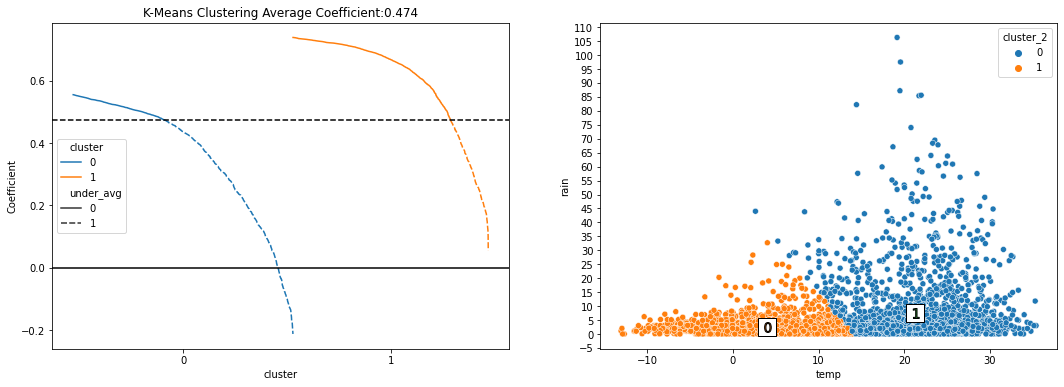

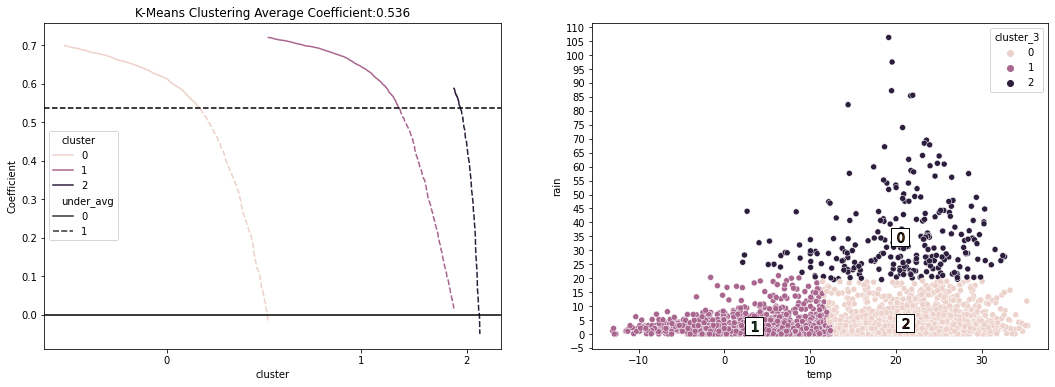

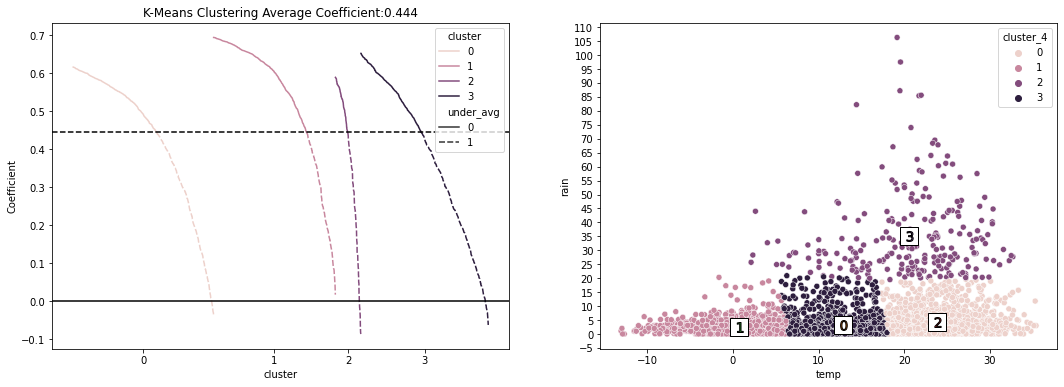

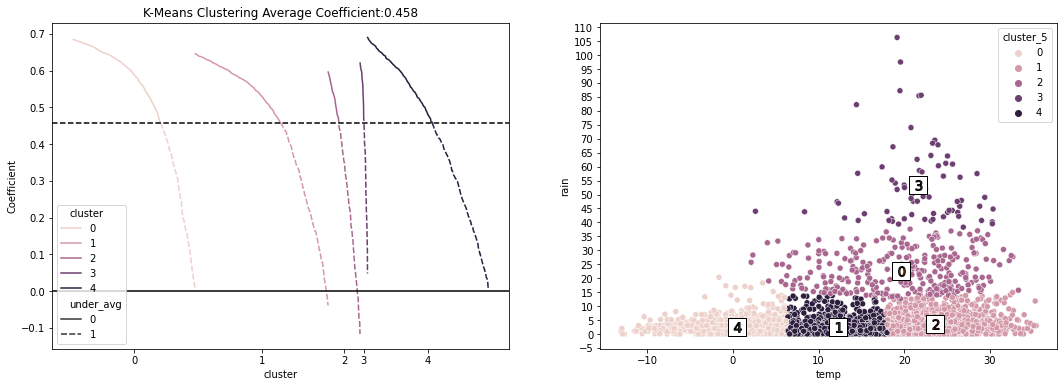

In [29]:
# K값이 2, 3, 4인 모델을 시각화하기 위한 반복문 생성 
for k in [2, 3,4,5]: 
    
    # 1. 실루엣 계수 분석을 위한 데이터 프레임 생성 
    sil_plot = df[['cluster_'+str(k), 'coef_'+str(k)]]
    sil_plot.columns = ['cluster', 'coef']
    
    # 실루엣 계수를 표시하기 위해 군집수 및 계수별 정렬 
    sil_plot = sil_plot.sort_values(by=['cluster','coef'], ascending=[True, False]).reset_index()
    
    # 실루엣 플롯을 그리기 위해 'x'열에 0부터 데이터 프레임의 크기만큼 일련번호 부여 
    sil_plot['id'] = pd.Series(range(0,len(sil_plot)))
    
    # 데이터의 계수가 실루엣 계수 평균의 이하인 경우를 구분하기 위한 열 생성 
    sil_plot['under_avg'] = np.where(sil_plot['coef']>sil_plot['coef'].mean() , 0, 1)
  

    # 군집 별 중심값을 구하기 위해 k-평균 군집화 모델 학습 
    kmeans = KMeans(n_clusters = k, random_state=830731) # 모델 설정 
    kmeans.fit(df[['temp', 'rain']]) # 모델 학습
    centers= kmeans.cluster_centers_ # 중심값 구하기 
    
    # 이미지를 표시할 캔버스 설정 
    figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2) 
    figure.set_size_inches(18,6) 

    # 각 군집 별 실루엣 계수를 선으로 시각화
    # hue: 군집 별 색깔을 다르게 표시하기 위함, 
    #style: 실루엣값에 따라 선 종류 변경 
    sns.lineplot(
       data=sil_plot, x="id", y='coef', hue="cluster", style='under_avg', ax=ax1)

    # 전체 실루엣 계수 평균값을 그래프에 점선으로 표시 
    ax1.axhline(y=sil_plot['coef'].mean(), color="black", linestyle="--")
    # 실루엣 계수가 0인 점을 실선으로 표시 
    ax1.axhline(y=0, color="black", linestyle="-")
    
    # 시각화 레이블 표시: x축에 군집을 표시하기 위해 군집 수 만큼 단위 설정  
    ax1.set_xticks(sil_plot.groupby('cluster')['id'].median())
    # 군집을 표시하기 위해 데이터 속에 있는 군집수를 레이블로 변경 
    ax1.set(xticklabels=sil_plot['cluster'].unique())

    # 시각화된 이미지에 정보 표시 
    ax1.set_title("K-Means Clustering Average Coefficient:{0:.3f}".format(sil_plot['coef'].mean()))
    ax1.set_xlabel("cluster")
    ax1.set_ylabel("Coefficient")
    
    # 1. 스캐터 플롯
    sns.scatterplot(x=df['temp'], y=df['rain'], hue=df['cluster_'+str(k)], ax=ax2)

    # Y 축의 단위를 설정 (y축 단위를 5로 설정)
    ax2.yaxis.set_major_locator(mpl.ticker.MultipleLocator(5))  


    # 2. 군집 집단 중심점 표시
    ax2.scatter(centers[:, 0], centers[:, 1], marker='s',
                c="white", alpha=1, s=300, edgecolor='black') 


    # 3. 각 점마다 집단에 해당하는 숫자 표시
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=100, edgecolor='black')
